In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [9]:
%run ../modules/utils.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb

In [3]:
df_noad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/1_Mock_10ul_9min_NewOmics.xlsx')
df_ad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df_noad = thermo_df(df_noad)
df_ad = thermo_df(df_ad)

In [109]:
df_25k_noad = df_noad[(df_noad.Mass > 23000) & (df_noad.Mass < 24500) & (df_noad.RT < 5) & (df_noad.Vol > 1E5)]
# plotly_zone(df_25k_noad, y='RT')

In [110]:
df_25k_ad = df_ad[(df_ad.Mass > 24000) & (df_ad.Mass < 24500) & (df_ad.Vol > 1E5)]
# plotly_zone(df_25k_ad, y='RT')

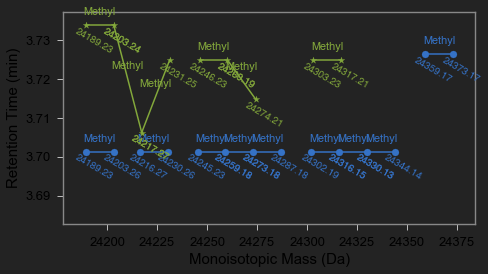

In [108]:
df_a = df_25k_noad.copy()
df_b = df_25k_ad.copy()
df_b.RT = df_b.RT / 6.53
df_a['isAD'] = False
df_b['isAD'] = True
df_merge = pd.concat([df_a, df_b])

bcr = base_calling_random(df_a, silence=True, homology=True)
plt, fig = plot_basecalling(*bcr, annotate=True)
bcr = base_calling_random(df_b, silence=True, homology=True)
plt, fig = plot_basecalling(*bcr, annotate=True, plt=plt, color='g', marker='*', fig=fig)

output(plt, fig, 'homology')

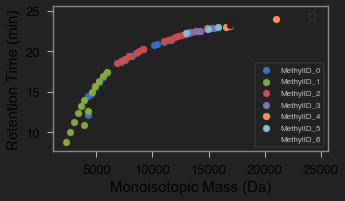

In [134]:
df_5p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/Group_24203/24203_5p_s3.xlsx')
df_5p.head()
plt = matplotlib.pyplot
# if not fig:
fig = plt.figure(figsize=(5, 3))
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

for mod_id in df_5p.ModificationId.unique():
    df_tmp = df_5p[df_5p.ModificationId == mod_id]
    plt.scatter(df_tmp.Mass, df_tmp.RT, label=f'MethylID_{mod_id}')

plt.legend(fontsize=8)
output(plt, fig, '24203_5p')

In [14]:
df_mass = comm_dots(df3, df6, masses[0])

full_mass 24189.23 sum_value 24207.2
full_mass 24189.23 sum_value 24207.2


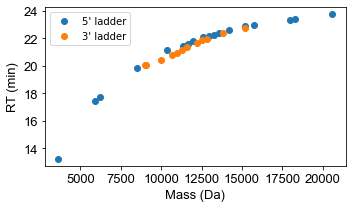

In [26]:
# plt = matplotlib.pyplot
# if not fig:
import matplotlib.pyplot as plt

df_mass = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/SourceGlu/ladders_split_s3_24189.xlsx')
df_glu_5p = df_mass[df_mass.is5p==True]
df_glu_3p = df_mass[df_mass.is5p==False]
# plt = matplotlib.pyplot
fig = plt.figure(figsize=(5, 3))
plt.xlabel('Mass (Da)', fontname="Arial", fontsize=13, color='black')
plt.ylabel('RT (min)', fontname="Arial", fontsize=13, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

plt.scatter(df_glu_5p.Mass, df_glu_5p.RT, label="5' ladder")
plt.scatter(df_glu_3p.Mass, df_glu_3p.RT, label="3' ladder")
plt.legend()
output(plt, fig, 'masssum')

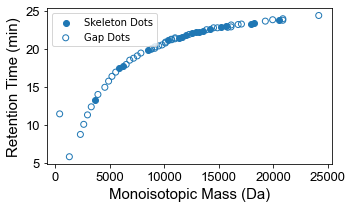

In [27]:
# Glu 24189 Skeleton
df_masssum = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/SourceGlu/masssum_s3_24189_5p.xlsx')
df_glu_skeleton = df_masssum[df_masssum.isSkeleton==True]
df_glu_gap = df_masssum[df_masssum.isSkeleton==False]

fig = plt.figure(figsize=(5, 3))
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

plt.scatter(df_glu_skeleton.Mass, df_glu_skeleton.RT, label='Skeleton Dots')
plt.scatter(df_glu_gap.Mass, df_glu_gap.RT, label='Gap Dots') # , facecolors='none'

plt.legend() #fontsize=8
output(plt, fig, 'GapFill')

In [ ]:
# Fig 4 Homology
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/HomologyData_Fig2.xlsx')
# # plotly_zone(df, y='Vol')
# bcr = base_calling_random(df, homology=True)
# # print(bcr)
# plt, fig = plot_basecalling1(df, bcr[1], y='Vol')
# df_ad = df[df.isAD==True]
# df_noad = df[df.isAD==False]
# plt.scatter(df_ad.Mass, df_ad.Vol, marker='o', s=200, color='g')
# plt.scatter(df_noad.Mass, df_noad.Vol, marker='*', s=200, color='C0')
# output(plt, fig, 'homology')

In [107]:
def plot_basecalling(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None, fig=None, color='C0', marker='o', y='RT'):
#     if in_plt:
#         plt = in_plt
#     else:
    if not plt:
        plt = matplotlib.pyplot
    if not fig:
        fig = plt.figure(figsize=(7, 4))
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    
    for idx, row in df.iterrows():
        x_pos = row.Mass
        y_pos = row[y]
        mass = '{:.2f}'.format(x_pos)
        plt.scatter(x_pos, y_pos, color=color, marker=marker) #, s=200
#         plt.annotate(s=mass, size=8, xy=(x_pos, y_pos), 
#                      textcoords="offset points", xytext=(10, -10), ha='center')

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        plt.plot(df_pair.Mass, df_pair[y], color)
        
        idmax = df_pair.Mass.idxmax()
        x_pos = df_pair.Mass.mean()
        y_pos = df_pair[y].mean()
        plt.annotate(s=t[2], size=11, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(0, 10), ha='center', color=color)
#         plt.annotate(s=t[2], size=15, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
#                      textcoords="offset points", xytext=(-10, 10), ha='center', color='C0')
        
        if not annotate:
            continue
            
#         mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
#         plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')
#         print(mass_pairs, df_pair)
        mass = '{:.2f}'.format(df_pair.iloc[0].Mass)
        plt.annotate(s=mass, size=10, xy=(df_pair.iloc[0].Mass, df_pair.iloc[0][y]), 
                     textcoords="offset points", xytext=(8, -28), ha='center', rotation=-30, color=color)
        mass = '{:.2f}'.format(df_pair.iloc[1].Mass)
        plt.annotate(s=mass, size=10, xy=(df_pair.iloc[1].Mass, df_pair.iloc[1][y]), 
                     textcoords="offset points", xytext=(8, -28), ha='center', rotation=-30, color=color)

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    return plt, fig

In [5]:
def output(plt, fig, svg_name, transparent=True):
    fig.tight_layout()
    plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/Draw/Outputs_Fig4/{svg_name}.svg', dpi=300, transparent=transparent)



In [13]:
def comm_dots(df1, df2, intact_mass):
    df_ms_1, _ = computational_data_seperation(df1, df1, full_mass=intact_mass, ignore_endpoints=True)
    df_ms_2, _ = computational_data_seperation(df2, df2, full_mass=intact_mass, ignore_endpoints=True)
    df_comm = match_dfs(df_ms_2, df_ms_1)
    return df_comm

In [10]:
df3 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df6 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df3 = thermo_df(df3)
df6 = thermo_df(df6)
df3.shape, df6.shape

((4593, 3), (2727, 3))

In [11]:

masses = [24189.23, 24203.24, 24217.27, 24231.25]